# ЛР3
## Задание
Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
* масштабирование признаков (не менее чем тремя способами);
* обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
* обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
* отбор признаков:
    - один метод из группы методов фильтрации (filter methods);
    - один метод из группы методов обертывания (wrapper methods);
    - один метод из группы методов вложений (embedded methods).

## Описание датасета

Космическая обсерватория Кеплер - это спутник, созданный НАСА, который был запущен в 2009 году. Телескоп должен был искать экзопланеты в звездных системах, помимо нашей, с конечной целью, возможно, найти другие обитаемые планеты. По состоянию на май 2016 года Кеплер проверил 1284 новые экзопланеты. По состоянию на октябрь 2017 года насчитывается уже более 3000 подтвержденных экзопланет (с использованием всех методов обнаружения, включая наземные). Телескоп все еще активен и продолжает собирать новые данные о своей расширенной миссии.

Датасет содержит записи всех наблюдаемых Кеплером объектов - 10 000 кандидатов в экзопланеты, за которыми Кеплер наблюдал. Суммарно 9564 строки и 50 колонок.

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)  

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

/kaggle/input/kepler-exoplanet-search-results/cumulative.csv


In [2]:
data = pd.read_csv('/kaggle/input/kepler-exoplanet-search-results/cumulative.csv', sep=",")

In [3]:
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Препроцессинг - Устранение пропусков в данных
В данных присутствуют пропуски

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [128]:
dict_null = dict()
for c in data.columns:
    dict_null[c] = data[c].isnull().sum()*100.0/9564.0


Удалю признаки с количесвтом пропуском >5%

In [6]:
data.drop(axis=1, columns=list({k for (k,v) in dict_null.items() if v>5}), inplace=True)

In [7]:
data.shape

(9564, 45)

Пропуски в числовых признаках буду заполнять медианой, а пропуски в категориальных признаках буду заполнять специальным значением - "fill"

In [9]:
object_col = []
for i in list({k for (k,v) in dict_null.items() if v>0 and v<5}):
    if data.dtypes[i] == 'int64' or data.dtypes[i] == 'float64':
        data[i] = data[i].fillna(data[i].median())
    else:
        object_col.append(i)
        data[i] = data[i].fillna('fill')
    

# Кодирование категориальных признаков
Кодирование категориальных признаков буду производить с помощью разных энкодеров:
kepoi_name, уникальные значения, - sklearn.LabelEncoder
остальные - category_encoders.CountEncoder

In [10]:
object_col = ["kepoi_name", "koi_disposition", "koi_pdisposition", 'koi_tce_delivname']

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

from category_encoders.count import CountEncoder as ce_CountEncoder

ce = ce_CountEncoder(normalize=True)

for i in data.columns:
    if data.dtypes[i] == 'object':
        if i == 'kepoi_name':
            data[i] = le.fit_transform(data[i])
        else:
            data[i] = ce.fit_transform(data[i])

In [15]:
data.head()

,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,1080,0.239753,0.470096,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,0.842116,5455.0,81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,1081,0.239753,0.470096,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,0.842116,5455.0,81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,1082,0.525199,0.529904,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,0.842116,5853.0,158.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,1083,0.525199,0.529904,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,0.842116,5805.0,157.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,1084,0.239753,0.470096,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,0.842116,6031.0,169.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


В датасете не осталось признаков с типом object

**Гистограммы признаков до масштабирования**

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


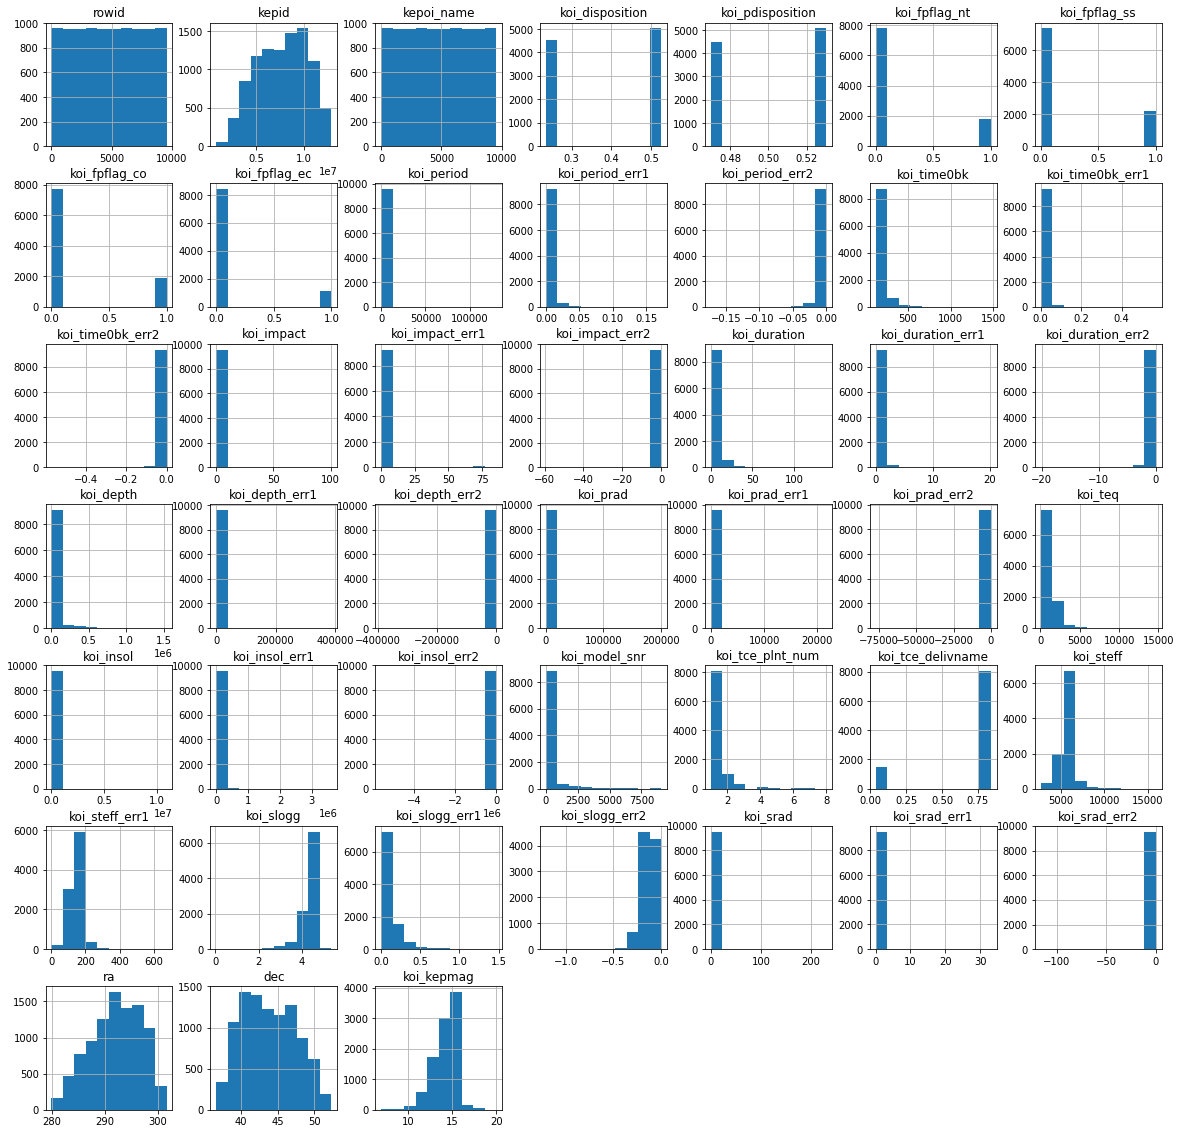

In [16]:
import matplotlib.pyplot as plt
data.hist(figsize=(20,20))
plt.show()

# 1. Масштабирование признаков
## 1.1. Масштабирование данных на основе Z-оценки
Реализван в StandardScaler

In [18]:
z_scale = StandardScaler()
data_z_scale = z_scale.fit_transform(data)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


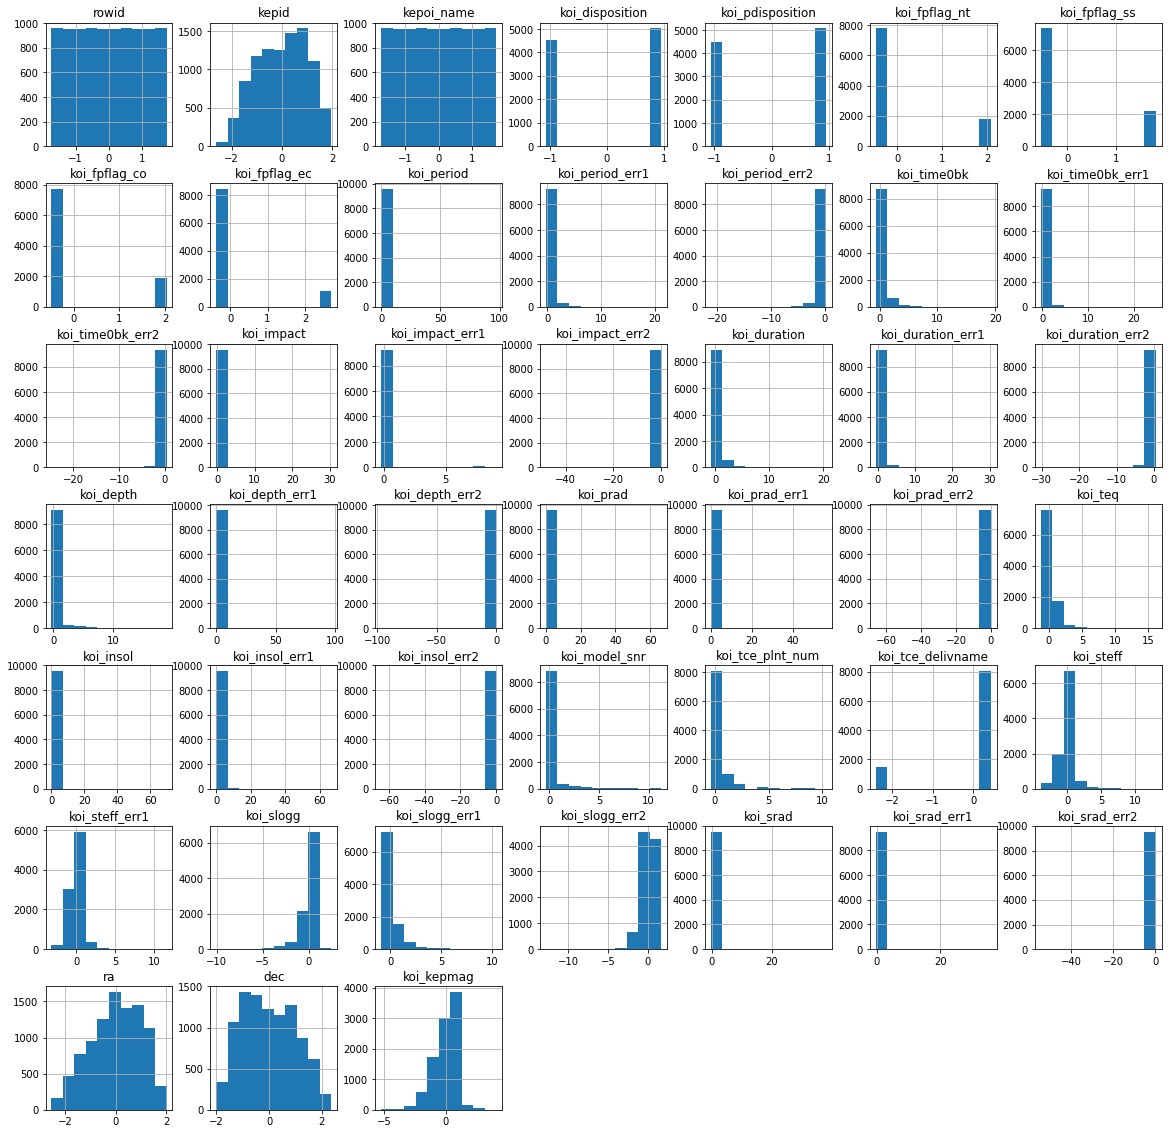

In [20]:
pd.DataFrame(data_z_scale, columns=data.columns).hist(figsize=(20,20))
plt.show()

В результате применения z-оценки средние значения были приведены к 0, формы исходных распределений сохраняются, максимальные и минимальные значения  варьируются, выбросы созранились.
## 1.2. MinMax-масштабирование
Реализван в MinMaxScaler 

In [21]:
minmax_scaler = MinMaxScaler()
data_minmax = minmax_scaler.fit_transform(data)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


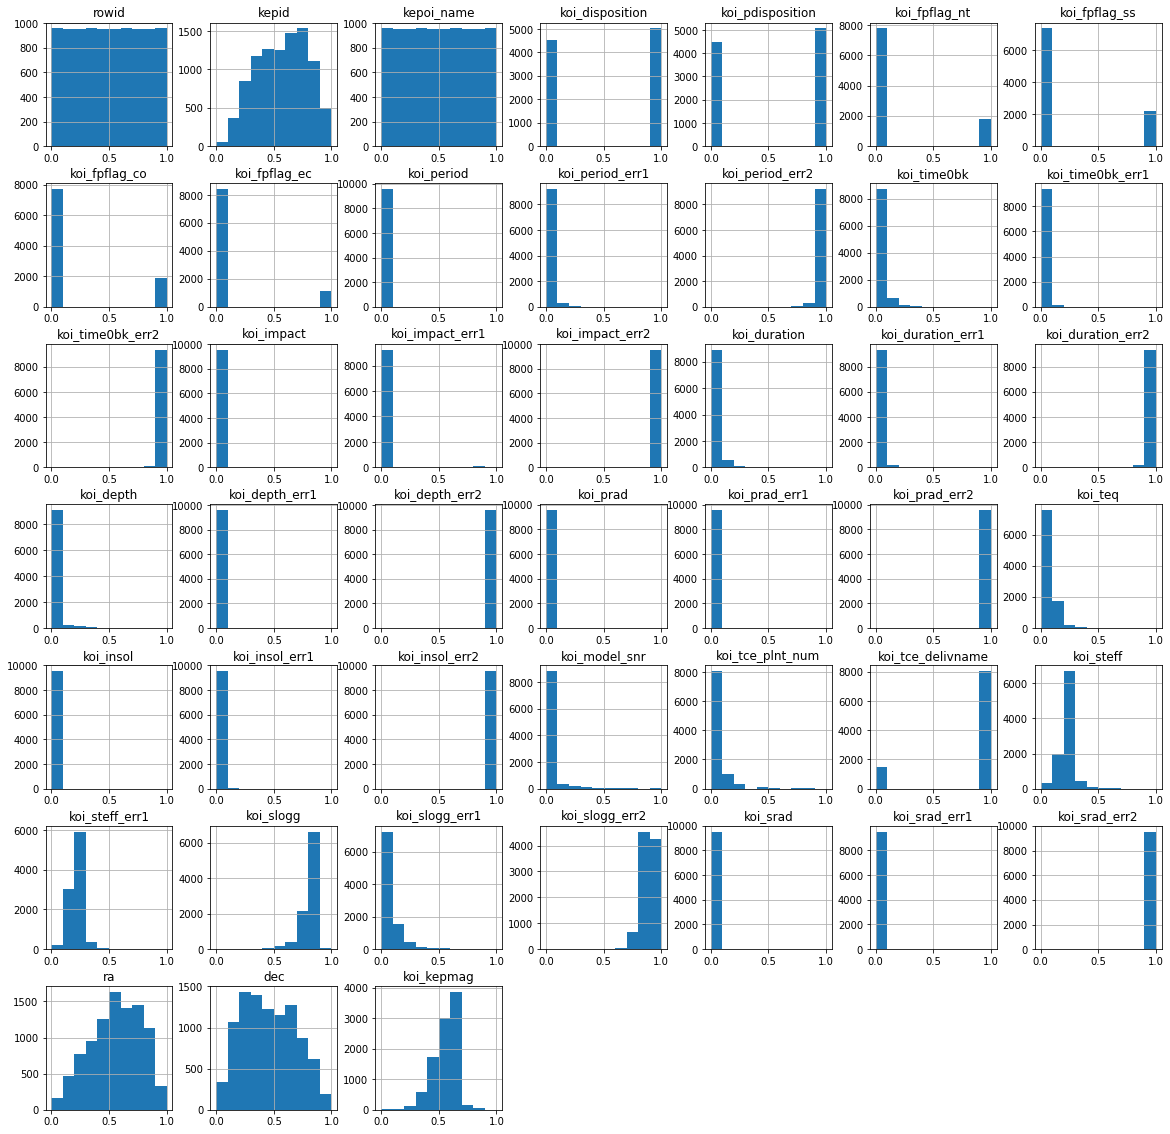

In [22]:
pd.DataFrame(data_minmax, columns=data.columns).hist(figsize=(20,20))
plt.show()

В результате применения MinMaxScaler средние значения варьируются, формы распределений существенно не изменились, максимальные и минимальные значения находятся в диапазоне [0;1], выбросы сохранились.
## 1.3. Масштабирование по медиане
Реализовано в RobustScaler

In [23]:
rob_scaler = RobustScaler()
data_rob_scaler = rob_scaler.fit_transform(data)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


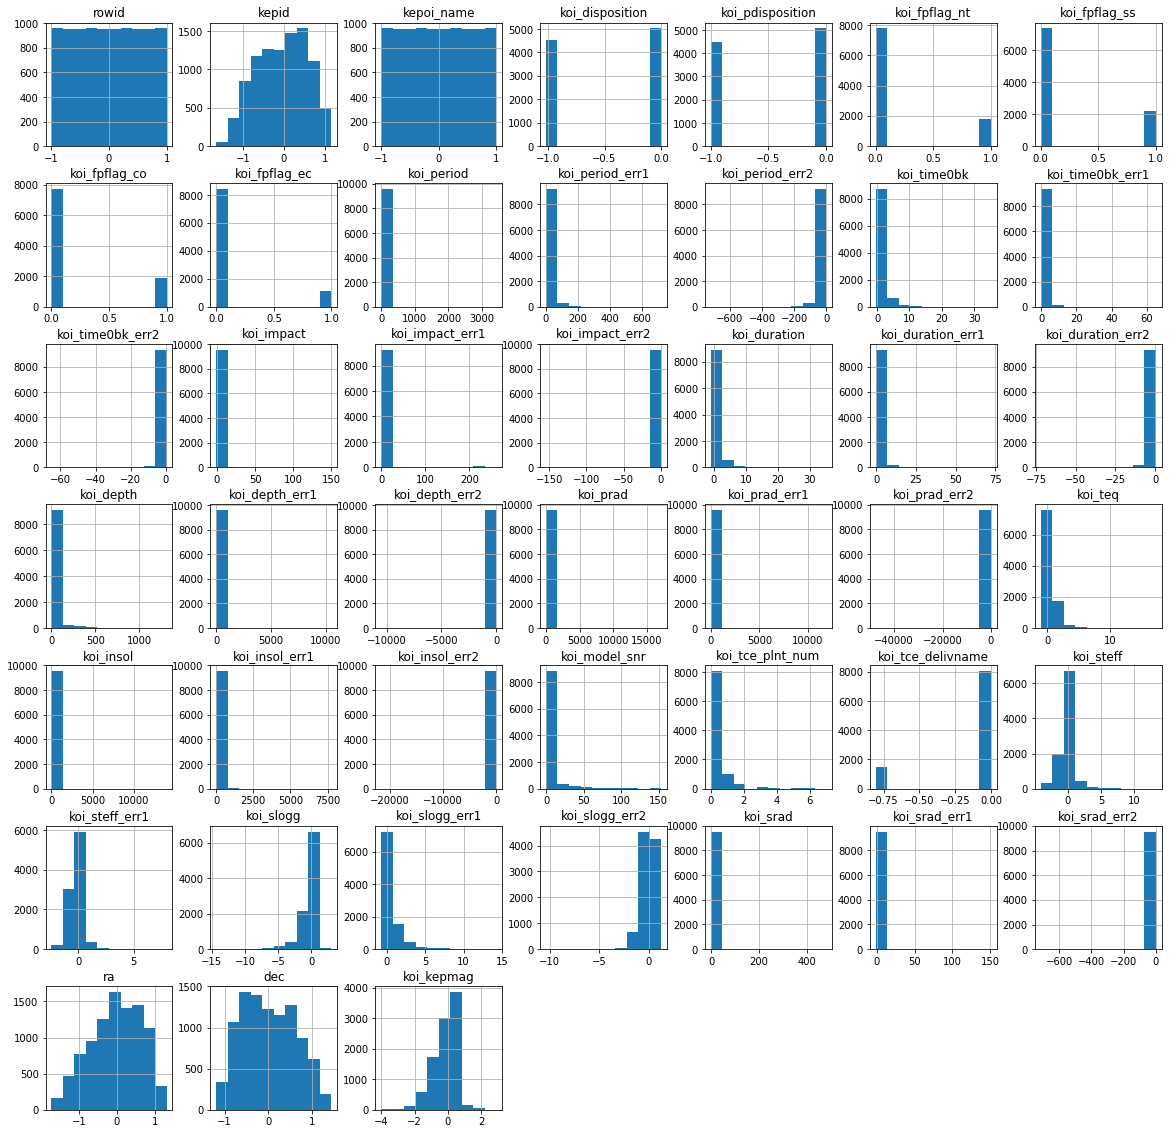

In [24]:
pd.DataFrame(data_rob_scaler, columns=data.columns).hist(figsize=(20,20))
plt.show()

In [28]:
print(data.koi_slogg_err2.median())
pd.DataFrame(data_rob_scaler, columns=data.columns).koi_slogg_err2.median()

-0.128


0.0

В результате применения Robust_scaler медиана распределений была приведена приводится к 0, форма исходных распределений изменилась, **выбросы устранились**.
# 2. Обработка выбросов для числовых признаков
## 2.1. Замена выбросов на основе 5% и 95% квантилей
Обнаружение и замена выбросов будет производиться для признака koi_steff


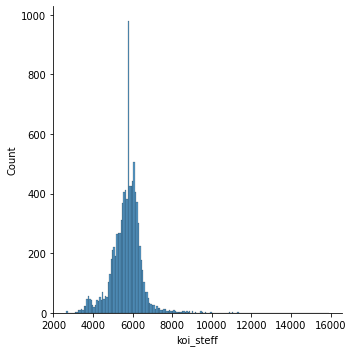

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data, x="koi_steff")

4348.0 6706.0


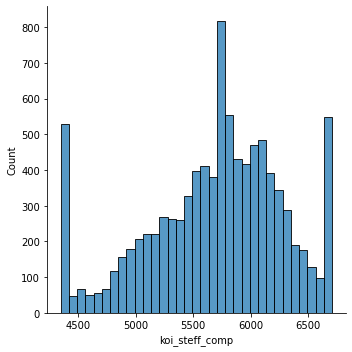

In [30]:
q5 = data.koi_steff.quantile(0.05)
q95 = data.koi_steff.quantile(0.95)
print(q5, q95)

data['koi_steff_comp'] = np.where(data.koi_steff < q5, q5, 
                         np.where(data.koi_steff > q95, q95, data.koi_steff))
sns.displot(data, x="koi_steff_comp")

## 2.2. Удаление с использованием межквартильного размаха
Обнаружение и удаление выбросов будет производиться для признака koi_steff

In [32]:
q25, q75

(5333.0, 6099.0)

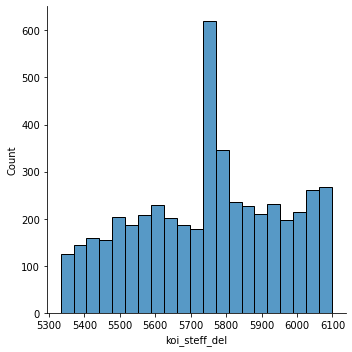

In [31]:
K = 1.5
q25 = data.koi_steff.quantile(0.25)
q75 = data.koi_steff.quantile(0.75)


IQR = q75 - q25
lower_boundary = q25 - (K * IQR)
upper_boundary = q75 + (K * IQR)

data['koi_steff_del'] = data.koi_steff.loc[~(np.where(data.koi_steff < q25, True, 
                         np.where(data.koi_steff > q75, True, False))), ]  
sns.displot(data, x="koi_steff_del")

# 3. Обработка нестандартного признака


В датасете не представлено нестандартных признаков, поэтому добавлю колонку со случайными датами и создам с ее помощью производные признаки - день недели, год, месяц, неделя

In [121]:
from random import randrange
from datetime import timedelta
from datetime import datetime

d1 = datetime.strptime('1/1/2009 1:30 PM', '%m/%d/%Y %I:%M %p')
d2 = datetime.strptime('1/1/2017 4:50 AM', '%m/%d/%Y %I:%M %p')


def random_date(d,start=d1, end=d2):

    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return start + timedelta(seconds=random_second)

In [122]:
data['random_date'] = data.koi_steff.apply(random_date)


In [123]:
data.random_date

0      2013-09-26 00:44:46
1      2013-10-05 06:57:29
2      2015-02-08 21:16:00
3      2009-06-18 18:25:12
4      2014-09-01 18:24:03
               ...        
9559   2010-11-03 02:47:14
9560   2009-12-09 12:25:36
9561   2010-07-24 05:46:35
9562   2014-01-06 20:21:24
9563   2011-05-18 01:45:23
Name: random_date, Length: 9564, dtype: datetime64[ns]

In [125]:
data['random_date_weekday'] = data['random_date'].apply(lambda x: x.date().weekday())
data['random_date_year'] = data['random_date'].dt.year
data['random_date_month'] = data['random_date'].dt.month
data['random_date_week'] = data['random_date'].dt.week

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


Результат

In [127]:
data[['random_date','random_date_weekday', 'random_date_year', 'random_date_month', 'random_date_week']]

,random_date,random_date_weekday,random_date_year,random_date_month,random_date_week
0,2013-09-26 00:44:46,3,2013,9,39
1,2013-10-05 06:57:29,5,2013,10,40
2,2015-02-08 21:16:00,6,2015,2,6
3,2009-06-18 18:25:12,3,2009,6,25
4,2014-09-01 18:24:03,0,2014,9,36
...,...,...,...,...,...
9559,2010-11-03 02:47:14,2,2010,11,44
9560,2009-12-09 12:25:36,2,2009,12,50
9561,2010-07-24 05:46:35,5,2010,7,29
9562,2014-01-06 20:21:24,0,2014,1,2


# 4. Отбор признаков
## 4.1. Группа методов фильтрации - Удаление константных и псевдоконстантных признаков
VarianceThreshold

In [35]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [39]:
filter_method = VarianceThreshold(threshold=0.15)
filter_method.fit(data)
# Значения дисперсий для каждого признака
dict(zip(data.columns, filter_method.variances_))

{'rowid': 7622507.916666667,
 'kepid': 7040108912356.319,
 'kepoi_name': 7622507.916666667,
 'koi_disposition': 0.020653609281324942,
 'koi_pdisposition': 0.0008910389660237114,
 'koi_fpflag_nt': 0.15278435916367686,
 'koi_fpflag_ss': 0.1779601827465011,
 'koi_fpflag_co': 0.15691248427245552,
 'koi_fpflag_ec': 0.10562542757143273,
 'koi_period': 1781355.3927057358,
 'koi_period_err1': 6.48122663732829e-05,
 'koi_period_err2': 6.48122663732829e-05,
 'koi_time0bk': 4612.502742103357,
 'koi_time0bk_err1': 0.0005096325609101442,
 'koi_time0bk_err2': 0.0005096325609101442,
 'koi_impact': 10.789285214755926,
 'koi_impact_err1': 84.68564850929324,
 'koi_impact_err2': 1.4884690937431888,
 'koi_duration': 41.876628747831056,
 'koi_duration_err1': 0.42908967780327,
 'koi_duration_err2': 0.42908967780327,
 'koi_depth': 6526373509.186501,
 'koi_depth_err1': 16109426.799172996,
 'koi_depth_err2': 16109426.799172996,
 'koi_prad': 9111738.100988487,
 'koi_prad_err1': 147177.37117065108,
 'koi_prad_er

Здесь присутствуют маловариативные признаки. Удалим константные и псевдоконстантные признаки - из 52 осталось 37

In [42]:
len(filter_method.transform(data)[0])

37

## 4.2. Группа методов обертывания - Алгоритм полного перебора
ExhaustiveFeatureSelector

Будет решаться задача классификации, целевой признак - koi_disposition. Проведу заново обработку датасета

In [43]:
data = pd.read_csv('/kaggle/input/kepler-exoplanet-search-results/cumulative.csv', sep=",")

In [45]:
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


<AxesSubplot:>

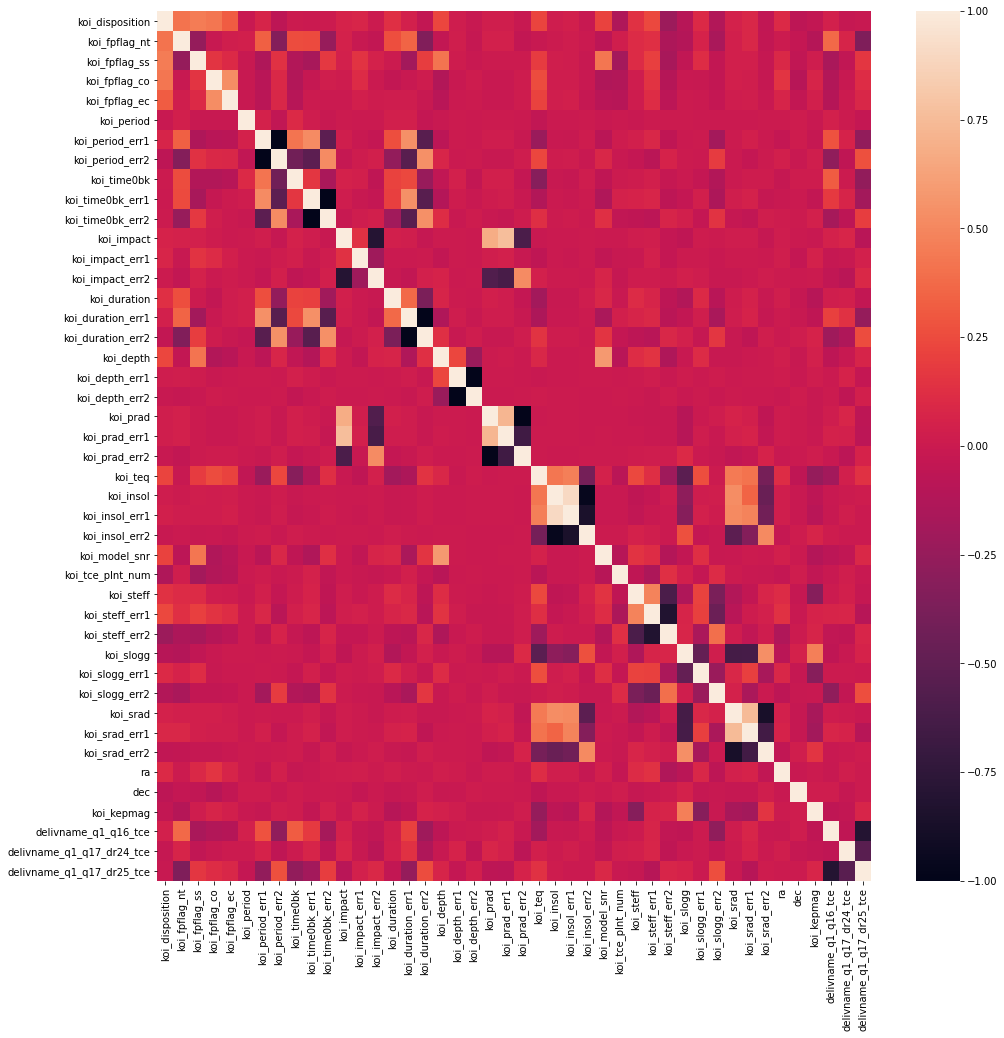

In [77]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(),fmt='.3f')

In [ ]:
ТАК ЖЕ НАДО УДАЛИТЬ 'koi_period_err1', 'koi_time0bk_err1', 'koi_impact_err1', 

In [66]:
data.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

Сокращу пространство признаков

In [93]:
feature = [  
       'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 
       'koi_duration',  'koi_depth',
        'koi_prad',  'koi_teq', 
        'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff',  
        'ra', 'dec', 'koi_kepmag'] 

<AxesSubplot:>

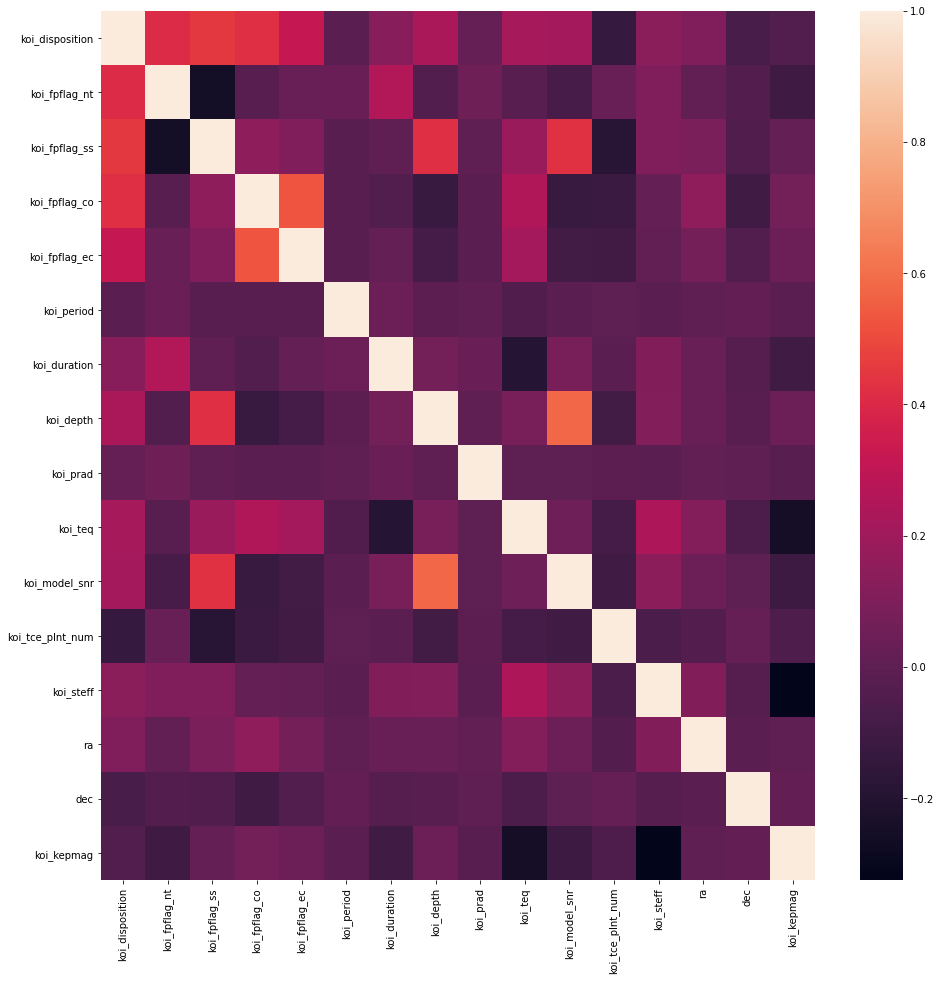

In [90]:
plt.figure(figsize = (16,16))
sns.heatmap(df[feature].corr(),fmt='.3f')

In [94]:
# Удалю неинформативные признаки, например rowid - номер строки датасета
df = data.copy()
df = df.drop(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_score'], axis=1)

# Удалю пустые признаки
df = df.drop(['koi_teq_err1', 'koi_teq_err2'], axis=1)

# Заполнение пропусков
df['koi_tce_delivname'] = df['koi_tce_delivname'].fillna(df['koi_tce_delivname'].mode()[0])
for column in df.columns[df.isna().sum() > 0]:
    df[column] = df[column].fillna(df[column].mean())

# One-hot encode koi_tce_delivname 
delivname_dummies = pd.get_dummies(df['koi_tce_delivname'], prefix='delivname')
df = pd.concat([df, delivname_dummies], axis=1)
df = df.drop('koi_tce_delivname', axis=1)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

from category_encoders.count import CountEncoder as ce_CountEncoder

ce = ce_CountEncoder(normalize=True)

for i in data.columns:
    if data.dtypes[i] == 'object':
        if i == 'koi_disposition':
            data[i] = le.fit_transform(data[i])
        else:
            data[i] = ce.fit_transform(data[i])

# Разделение датасета признаки и целевой признак
y = df['koi_disposition']
X = df.drop('koi_disposition', axis=1)[feature]

# Scale X
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [95]:
X.shape

(9564, 15)

In [96]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

In [97]:
efs = EFS(knn, 
           min_features=10,
           max_features=15,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs = efs.fit(X, y, custom_feature_names=X.columns)

print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

Features: 4944/4944

Best accuracy score: 0.69
Best subset (indices): (0, 1, 2, 3, 4, 5, 7, 9, 10, 14)
Best subset (corresponding names): ('koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_duration', 'koi_prad', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_kepmag')


с 44 признаками accuracy была 0.64

c 10 признаками - 0.69

Самые важные признаки: 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_duration', 'koi_prad', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_kepmag'


## 4.3. Метод вложений - логистическая регрессия
SelectFromModel

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X[feature], y)
# Коэффициенты регрессии
print(e_lr1.coef_)

sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X[feature], y)
sel_e_lr1.get_support()

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[-6.47158220e+00 -3.26939741e+00 -5.65273814e+00 -5.53012534e+00
   5.44456617e-03 -2.20041433e-02 -4.76437604e-07 -1.91389521e-05
   4.04323824e-04 -1.19837194e-03 -1.89306658e-01  2.36813700e-05
  -6.01357410e-05 -3.96824420e-04  2.42063908e-02]
 [-3.13991044e+00 -2.69956798e+00 -4.22768460e+00 -4.79837974e+00
  -7.94341703e-03  2.39875698e-02 -6.50135215e-05 -3.89668458e-02
  -6.12760623e-04  1.43505813e-03  2.43323440e-01 -2.50797768e-04
  -1.53152624e-04  3.93731686e-02 -5.21035106e-02]
 [ 7.74769167e+00  5.87574184e+00  8.27748836e+00  8.62625095e+00
   2.86774405e-06  8.06484296e-02  3.49358128e-05  3.14715118e-04
   2.12060258e-04 -4.24890713e-04 -4.69407250e-01  2.13522588e-04
  -4.94730618e-03 -1.89203365e-02 -5.60712401e-02]]


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

Все ризнаки оказались важными